100%|██████████| 500/500 [00:34<00:00, 13.87it/s]


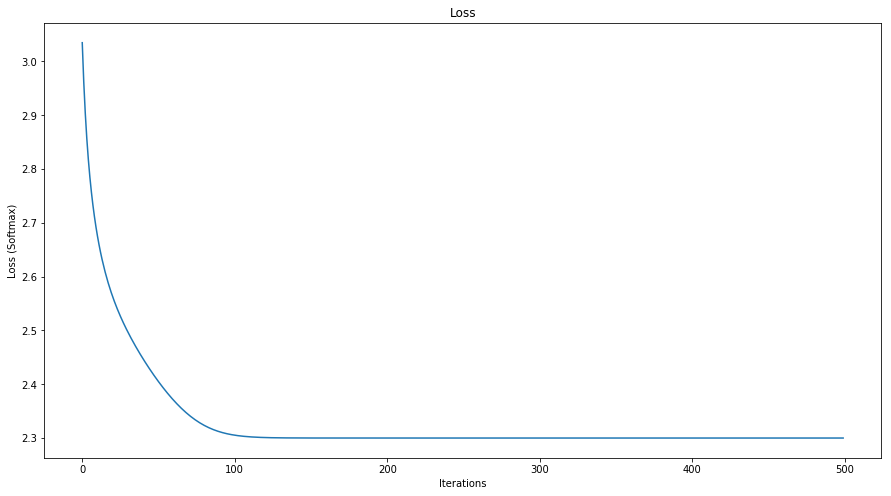

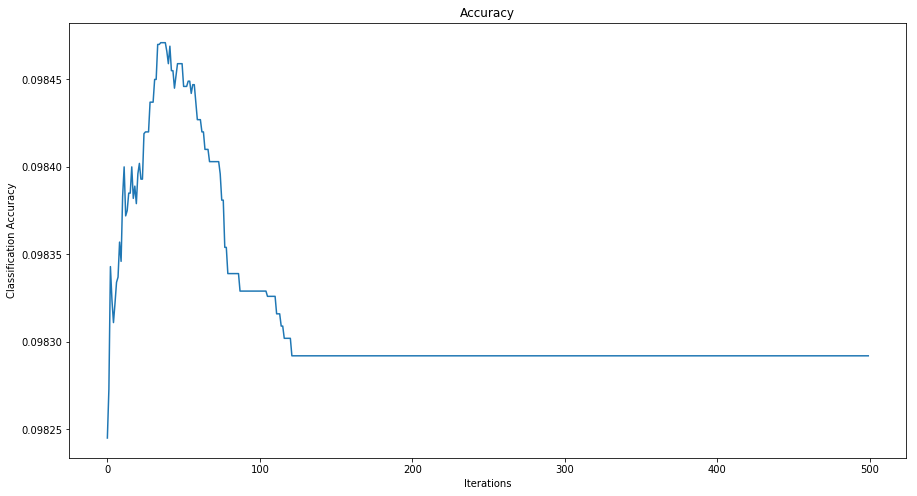

In [53]:
# =============================================
#
# load cifar-10-small and project down
#
 
from tqdm import tqdm
import numpy as np
from copy import deepcopy
    
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
N = 1000
D = 10
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
 
# project down into a D-dimensional space
features = np.dot( features, np.random.randn( 3072, D) )
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)



W = np.random.randn(features.shape[1],features.shape[1])



def loss_function():
    
    scores = W.dot(features.T).T

    scores = np.transpose(scores.T - np.max(scores, axis=1))

    scores = np.exp(scores)

    scores = np.transpose(scores.T / np.sum(scores, axis=1))

    loss = -np.log(np.take(scores, labels))
    
    loss = np.sum(loss)/len(loss)
    return loss
    
    
    

def numerical_gradient():
    
    epsilon = 0.01
    loss_return = loss_function()
    
#     print loss_return
#     W[0, 0] -= epsilon
#     print loss_function()
#     W[0, 0] += epsilon
    
    grad = np.zeros((W.shape[0],W.shape[1]))
    
    for i, row in enumerate(W):
        for j, value in enumerate(row):
            W[i, j] += epsilon
            grad[i][j] = (loss_function() - loss_return ) / epsilon 
            W[i, j] = value
            

    return loss_return, grad
        



NUM_EPOCHS = 500
step_size = 0.1

all_loss = []
all_acc = []

for i in tqdm(range(NUM_EPOCHS)):
    
    loss_function_value, grad = numerical_gradient()
    W = W - step_size * grad
    all_loss.append(loss_function_value)
#     print np.argmax(W.dot(features.T),axis=0).shape
#     print labels.shape
#     print np.mean(np.equal(labels, np.argmax(W.dot(features.T),axis=0)).astype(float))
    all_acc.append(np.mean(np.equal(labels, np.argmax(W.dot(features.T),axis=0)).astype(float)))
#     break
    
#     break
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.figure(1,figsize=(15,8))
one = plt.plot(range(NUM_EPOCHS),all_loss, label='c=1')
plt.title('Loss')

plt.xlabel('Iterations')
plt.ylabel('Loss (Softmax)')

plt.show()

plt.figure(2,figsize=(15,8))
one = plt.plot(range(NUM_EPOCHS),all_acc, label='c=1')
plt.title('Accuracy')

plt.xlabel('Iterations')
plt.ylabel('Classification Accuracy')

plt.show()


    
    